In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from scipy.interpolate import BSpline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.interpolate import splrep
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# part a
# split the dataset randomly 80-20

y = pd.read_csv("grp.csv",header=None )
y = y[0] == 'Cancer'
x = pd.read_csv("obs.csv",header=None)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [3]:
def get_coefs(x, knots=8, deg=3):
    knots_ = np.linspace(0, 1, knots+2)[1:-1]
    xx = np.linspace(0, 1, len(x))
    t, c, k = splrep(xx, x, task=-1, t=knots_, k=deg)
    return c[:knots+deg].reshape(-1, knots+deg)
xtr = np.array([x[0] for x in x_train.apply(lambda row:get_coefs(row.values) , axis=1)])
xte = np.array([x[0] for x in x_test.apply(lambda row:get_coefs(row.values) , axis=1)])

In [4]:
lambdas = np.linspace(0, 5, 101)[1:]
coeff_a = np.zeros((lambdas.shape[0],11))

best = -1*np.inf 
best_c = 0
for idx, lmda in enumerate(lambdas):    
    clf = LogisticRegression(random_state=0,penalty='l1', solver='liblinear', C=lmda,max_iter=200).fit(xtr, y_train)
    coeff_a[idx,:] = clf.coef_
    y_hat = clf.predict(xtr)
    a = accuracy_score(y_train, y_hat)
    if a>best: 
        best = a
        best_c = lmda

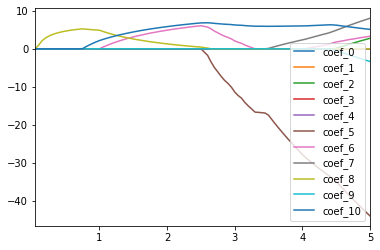

In [5]:
df = pd.DataFrame(coeff_a, columns =[f"coef_{i}" for i in range(xtr.shape[1])], index=lambdas)
df.plot()

In [6]:
clf = LogisticRegression(random_state=0,penalty='l1', solver='liblinear', C=best_c).fit(xtr, y_train)
y_hat = clf.predict(xte)
accuracy_score(y_test, y_hat)

/home/jfftilton/anaconda3/envs/omsa/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8863636363636364

In [7]:
scaler = StandardScaler()
scaler.fit(x_train.values)
x_train_scaled = scaler.transform(x_train.values)
x_test_scaled =  scaler.transform(x_test.values)

pca = PCA(n_components=10)
pca.fit(x_train_scaled)
x_train_transformed = pca.transform(x_train_scaled)

pca = PCA(n_components=10)
pca.fit(x_test_scaled)
x_test_transformed = pca.transform(x_test_scaled)

In [8]:
lambdas = np.linspace(0, 5, 101)[1:]
coeff_a = np.zeros((lambdas.shape[0],10))

best = -1*np.inf 
best_c = 0
for idx, lmda in enumerate(lambdas):    
    clf = LogisticRegression(random_state=0,penalty='l1', solver='liblinear', C=lmda,max_iter=200).fit(x_train_transformed, y_train)
    coeff_a[idx,:] = clf.coef_
    y_hat = clf.predict(x_train_transformed)
    a = accuracy_score(y_train, y_hat)
    if a>best: 
        best = a
        best_c = lmda
        

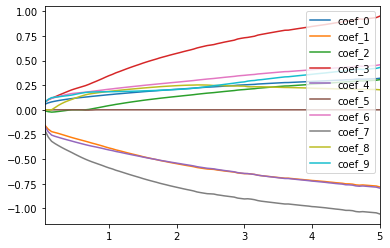

In [9]:
df = pd.DataFrame(coeff_a, columns =[f"coef_{i}" for i in range(x_train_transformed.shape[1])], index=lambdas)
df.plot()

In [10]:
clf = LogisticRegression(random_state=0,penalty='l1', solver='liblinear', C=best_c).fit(x_train_transformed, y_train)
y_hat = clf.predict(x_test_transformed)
accuracy_score(y_test, y_hat)

0.7954545454545454

### Discussion

B-spline dimensionality reduction had a higher accuracy, 88.6, compared to dimensionality reduction with PCA, 79.5 using logistic regression and l1 regularization.